In [1]:
import polars as pl
import numpy as np
import warnings
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import polars.selectors as cs

warnings.filterwarnings("ignore")

commission = 0.25 / 10000.0
commission = 0 / 10000.0
# commission = 10 / 10000.0

In [2]:
result_hour = pl.read_parquet('./kline_1d_df.parquet')
result_hour = result_hour.sort('open_time','jj_code')
result_hour = result_hour.rename({"jj_code": "symbol"})
# result_hour = result_hour.with_columns(
#     (pl.col('open_time').dt.round('1d')).alias('week')
# )
# result_hour = result_hour.set_sorted('open_time')
# result_hour = result_hour.set_sorted('week')
# result_hour = result_hour.groupby(['week','symbol']).agg(
#     pl.col('open_time').last(),
#     pl.col('close_time').last(),
#     pl.col('open').last(),
#     pl.col('high').last(),
#     pl.col('low').last(),
#     pl.col('close').last(),
#     pl.col('volume').sum(),
#     pl.col('quote_volume').sum(),
#     pl.col('taker_buy_volume').sum(),
#     pl.col('taker_buy_quote_volume').sum()
# )

In [3]:
result_hour

symbol,open_time,close_time,open,high,low,close,volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
str,datetime[ms],datetime[ms],f64,f64,f64,f64,f64,f64,i64,f64,f64
"""BCHUSDT""",2020-01-01 00:00:00,2020-01-01 23:59:59.999,204.72,208.95,202.95,204.44,235950.127,4.8629e7,36700,115834.074,2.3873e7
"""BTCUSDT""",2020-01-01 00:00:00,2020-01-01 23:59:59.999,7189.43,7260.43,7170.15,7197.57,56801.329,4.0968e8,101871,28834.2,2.0800e8
"""ETHUSDT""",2020-01-01 00:00:00,2020-01-01 23:59:59.999,129.12,132.96,128.62,130.62,466063.929,6.1038e7,40168,232492.871,3.0446e7
"""BCHUSDT""",2020-01-02 00:00:00,2020-01-02 23:59:59.999,204.45,205.54,192.08,195.73,307659.505,6.1783e7,44112,149683.497,3.0073e7
"""BTCUSDT""",2020-01-02 00:00:00,2020-01-02 23:59:59.999,7197.57,7209.59,6922.0,6962.04,115295.677,8.1563e8,224747,55404.262,3.9191e8
…,…,…,…,…,…,…,…,…,…,…,…
"""ZETAUSDT""",2024-08-04 00:00:00,2024-08-04 23:59:59.999,0.4405,0.4693,0.42,0.4365,3.4983473e7,1.5649e7,135889,1.736503e7,7.7707e6
"""ZILUSDT""",2024-08-04 00:00:00,2024-08-04 23:59:59.999,0.01422,0.01441,0.01301,0.01351,7.54978515e8,1.0355e7,77995,3.72537788e8,5.1092e6
"""ZKUSDT""",2024-08-04 00:00:00,2024-08-04 23:59:59.999,0.11451,0.11673,0.10122,0.10646,8.67048273e8,9.4865e7,742082,4.14946312e8,4.5429e7


In [4]:
result_hour = result_hour.sort('close_time', 'symbol')
result_hour = result_hour.filter(
    (pl.col("close_time") >= pl.datetime(2021, 1, 1)) & (pl.col("close_time") < pl.datetime(2024, 8, 1))
)
result_hour.filter(pl.col('symbol') == "BTCUSDT")

symbol,open_time,close_time,open,high,low,close,volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
str,datetime[ms],datetime[ms],f64,f64,f64,f64,f64,f64,i64,f64,f64
"""BTCUSDT""",2021-01-01 00:00:00,2021-01-01 23:59:59.999,28948.19,29668.86,28627.12,29337.16,210716.398,6.1575e9,1511793,101247.902,2.9602e9
"""BTCUSDT""",2021-01-02 00:00:00,2021-01-02 23:59:59.999,29337.15,33480.0,28958.24,32199.91,545541.08,1.7123e10,3514545,273388.463,8.5790e9
"""BTCUSDT""",2021-01-03 00:00:00,2021-01-03 23:59:59.999,32198.41,34832.25,32000.02,33054.53,487486.989,1.6389e10,3325307,238761.657,8.0294e9
"""BTCUSDT""",2021-01-04 00:00:00,2021-01-04 23:59:59.999,33053.93,33653.56,27800.0,32031.07,506128.023,1.5879e10,3470951,242947.199,7.6262e9
"""BTCUSDT""",2021-01-05 00:00:00,2021-01-05 23:59:59.999,32029.55,34500.0,29900.0,33999.52,433720.833,1.3959e10,3077140,214417.082,6.9050e9
…,…,…,…,…,…,…,…,…,…,…,…
"""BTCUSDT""",2024-07-27 00:00:00,2024-07-27 23:59:59.999,67882.5,69381.7,66624.5,67863.4,330978.555,2.2565e10,3655134,167349.922,1.1413e10
"""BTCUSDT""",2024-07-28 00:00:00,2024-07-28 23:59:59.999,67873.7,68300.0,67037.0,68206.3,116902.201,7.9203e9,1542376,57886.955,3.9219e9
"""BTCUSDT""",2024-07-29 00:00:00,2024-07-29 23:59:59.999,68215.5,70081.0,66365.8,66750.1,372535.191,2.5468e10,4092636,183070.467,1.2525e10


In [5]:
unique_symbols_count = result_hour.select(pl.col("symbol").n_unique()).to_numpy()[0, 0]
unique_symbols_count

np.uint32(303)

In [6]:
unique_symbols_list = result_hour.select(pl.col("symbol").unique()).to_series().to_list()
unique_symbols_list

['CYBERUSDT',
 'HOTUSDT',
 'ETHWUSDT',
 'AAVEUSDT',
 'KEYUSDT',
 'RVNUSDT',
 'TUSDT',
 'TOKENUSDT',
 'UNIUSDT',
 'ARPAUSDT',
 'STRAXUSDT',
 'GLMUSDT',
 'RIFUSDT',
 'STRKUSDT',
 'ONEUSDT',
 'BTCUSDT',
 'TNSRUSDT',
 'SPELLUSDT',
 'ADAUSDT',
 'LISTAUSDT',
 'ARUSDT',
 'UNFIUSDT',
 'AUCTIONUSDT',
 'MKRUSDT',
 'ICPUSDT',
 'AGIXUSDT',
 'MTLUSDT',
 'FLOWUSDT',
 'HFTUSDT',
 'LRCUSDT',
 'METISUSDT',
 'AIUSDT',
 'KAVAUSDT',
 'BAKEUSDT',
 'MOVRUSDT',
 'BTTUSDT',
 '1000SATSUSDT',
 'HNTUSDT',
 'WUSDT',
 'MATICUSDT',
 'TAOUSDT',
 'CVXUSDT',
 'DYDXUSDT',
 'AKROUSDT',
 'THETAUSDT',
 'REEFUSDT',
 'WIFUSDT',
 'FETUSDT',
 'ARBUSDT',
 'GMXUSDT',
 'MANAUSDT',
 'MASKUSDT',
 'EOSUSDT',
 'SRMUSDT',
 'BATUSDT',
 'ASTRUSDT',
 'STPTUSDT',
 'PEOPLEUSDT',
 'TRBUSDT',
 'ZILUSDT',
 'BONDUSDT',
 'KLAYUSDT',
 'OMNIUSDT',
 'BEAMXUSDT',
 'FRONTUSDT',
 'SXPUSDT',
 'MBLUSDT',
 '1000XECUSDT',
 'DUSKUSDT',
 'LINKUSDT',
 'DOTUSDT',
 'HIGHUSDT',
 'SAGAUSDT',
 'ILVUSDT',
 'MAVUSDT',
 'ARKMUSDT',
 'ZRXUSDT',
 'IOUSDT',
 'ZROUSDT

In [7]:
# result_hour = result_hour.sort("volume").head(100)

In [8]:
unique_symbols_count = result_hour.select(pl.col("symbol").n_unique()).to_numpy()[0, 0]
unique_symbols_count

np.uint32(303)

In [9]:
def extreme_MAD(data, column_name, n=5.2):
    # n=2
    data = data.with_columns((pl.col(column_name)-pl.col(column_name).median()).abs().median().over('symbol').alias('MAD'+str(column_name)))
    data = data.with_columns((pl.col(column_name).median() + n * pl.col('MAD'+str(column_name))).over('symbol').alias(str(column_name)+'upper_bound'))
    data = data.with_columns((pl.col(column_name).median() - n * pl.col('MAD'+str(column_name))).over('symbol').alias(str(column_name)+'lower_bound'))
    data = data.with_columns(
            pl.when(pl.col(column_name) > pl.col(str(column_name)+'upper_bound')).then(pl.col(str(column_name)+'upper_bound'))
            .when(pl.col(column_name) < pl.col(str(column_name)+'lower_bound')).then(pl.col(str(column_name)+'lower_bound'))
            .otherwise(pl.col(column_name))
            .alias(column_name)
                            )
    return data

In [10]:
def standardize_z(data, column_name):
    data = data.with_columns(((pl.col(column_name) - pl.col(column_name).mean()) / pl.col(column_name).std()).over('open_time')
        .alias(column_name)
                            )
    return data

In [11]:
def undimensionalize(data, column_name, window = 50):
    data = data.with_columns((pl.col(column_name) / pl.col(column_name).rolling_mean(window) - 1).over('symbol').alias(column_name))
    return data

In [12]:
def cal_skew(data, column_name):
    data = data.with_columns(
        (data.height * ((pl.col(column_name) - pl.col(column_name).mean())**3).sum() / (((pl.col(column_name) - pl.col(column_name).mean())**2).sum())**1.5)
        .over('symbol').alias('skewness')
    )
    return data

In [13]:
# 定义一个 sign 函数
def sign(column):
    return pl.when(column > 0).then(1).otherwise(pl.when(column < 0).then(-1).otherwise(0))

In [14]:
def ts_standardization(data, column_name, window = 5):
    data = data.with_columns(
    ((pl.col(column_name) - pl.col(column_name).rolling_mean(window_size=window)) /
     pl.col(column_name).rolling_std(window_size=window)).over('symbol').alias(column_name)
    )
    return data

In [15]:
result_hour.columns

['symbol',
 'open_time',
 'close_time',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'quote_volume',
 'count',
 'taker_buy_volume',
 'taker_buy_quote_volume']

In [16]:
result_hour = result_hour.with_columns(
    ((pl.col('close') - pl.col('close').shift(1))/pl.col('close').shift(1)).over('symbol').alias('ret')
)

In [17]:
result_hour.filter(pl.col('symbol') == '1000SATSUSDT')

symbol,open_time,close_time,open,high,low,close,volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ret
str,datetime[ms],datetime[ms],f64,f64,f64,f64,f64,f64,i64,f64,f64,f64
"""1000SATSUSDT""",2023-12-12 00:00:00,2023-12-12 23:59:59.999,0.000526,0.000565,0.000437,0.00055,6.3389e11,3.2014e8,1165607,3.1023e11,1.5686e8,null
"""1000SATSUSDT""",2023-12-13 00:00:00,2023-12-13 23:59:59.999,0.00055,0.000552,0.000455,0.000511,7.2079e11,3.5693e8,2198178,3.4957e11,1.7332e8,-0.070909
"""1000SATSUSDT""",2023-12-14 00:00:00,2023-12-14 23:59:59.999,0.00051,0.000795,0.000502,0.0007547,1.8704e12,1.2421e9,4686884,9.2600e11,6.1615e8,0.476908
"""1000SATSUSDT""",2023-12-15 00:00:00,2023-12-15 23:59:59.999,0.0007547,0.0009443,0.000701,0.0007295,2.4583e12,1.9969e9,8267770,1.1995e12,9.7579e8,-0.033391
"""1000SATSUSDT""",2023-12-16 00:00:00,2023-12-16 23:59:59.999,0.0007295,0.0008799,0.0006701,0.0007734,1.0929e12,8.4198e8,3983875,5.3415e11,4.1186e8,0.060178
…,…,…,…,…,…,…,…,…,…,…,…,…
"""1000SATSUSDT""",2024-07-27 00:00:00,2024-07-27 23:59:59.999,0.0003247,0.0003339,0.0003,0.0003175,1.4972e12,4.7305e8,1410595,7.2311e11,2.2860e8,-0.022475
"""1000SATSUSDT""",2024-07-28 00:00:00,2024-07-28 23:59:59.999,0.0003174,0.0003297,0.000305,0.0003125,1.0741e12,3.3939e8,1074864,5.2839e11,1.6700e8,-0.015748
"""1000SATSUSDT""",2024-07-29 00:00:00,2024-07-29 23:59:59.999,0.0003125,0.0003162,0.000289,0.0002944,1.2083e12,3.6816e8,1122642,5.7171e11,1.7432e8,-0.05792


In [18]:
factors = result_hour.with_columns(
    ((pl.col('close') - pl.col('close').shift(1))/pl.col('close').shift(1)).over('symbol').alias('ret')
)
# factors = factors.with_columns(
#     ((1 + pl.col('ret')).log()).over('symbol').alias('log_ret')
# )

#因子1 autocorr
factors = factors.with_columns(
    pl.col('close').shift(-1).over('symbol').alias('shift_close')
)
factors = factors.with_columns(
    pl.rolling_corr('close','shift_close',window_size=28).over('symbol').alias('autocorr_factor')
)
factors = factors.with_columns(
    (pl.col('ret').abs().rolling_sum(window_size=10)).over('symbol').alias('ret_sum')
)
factors = factors.with_columns(
    (pl.col('quote_volume').rolling_sum(window_size=10)).over('symbol').alias('volume_sum')
)
factors = factors.with_columns(
    (pl.col('ret_sum')/pl.col('volume_sum')).over('symbol').alias('amihud_ratio')
)
factors = factors.with_columns(
    (pl.col('amihud_ratio')+1).log().alias('amihud_ratio')
)
#因子2 amihud
# factors = factors.with_columns(
#     (pl.col('ret').abs().rolling_sum(window_size=10)).over('symbol').alias('ret_sum')
# )
# # factors = factors.with_columns(
# #     (pl.col('ret').clip_min(0).rolling_sum(window_size=10)).over('symbol').alias('ret_sum')
# # )
# # factors = factors.with_columns(
# #     (pl.col('ret').clip_max(0).rolling_sum(window_size=10)).over('symbol').alias('ret_sum')
# # )
# factors = factors.with_columns(
#     (pl.col('quote_volume').rolling_sum(window_size=10)).over('symbol').alias('volume_sum')
# )
# #周频最好window_size=5 日频=10
# factors = factors.with_columns(
#     (pl.col('ret_sum')/pl.col('volume_sum')).over('symbol').alias('amihud_ratio')
# )
# factors = factors.with_columns(
#     (pl.col('amihud_ratio')+1).log().alias('amihud_ratio')
# )
# #因子3 ret偏度 defualt:window_size=28
# factors = cal_skew(factors, 'ret')
factors = factors.with_columns(
    pl.col('ret').rolling_skew(10).over('symbol').alias('skewness')
)
factors = factors.with_columns(
    pl.col('ret').rolling_skew(7).over('symbol').alias('skewness7')
)

# print(factors.tail())
# #因子4 Taker buy Ratio
# factors = factors.with_columns((pl.col('close') / pl.col('open') - 1).over('symbol').alias('return'))
# factors = factors.sort(by=['symbol', 'open_time'])
# factors = factors.with_columns(
#     (pl.col("taker_buy_volume") / pl.col("volume")).over('symbol').alias("taker_buy_ratio")
# )
# #因子5 ID ratio
# factors = factors.with_columns((pl.col('close') / pl.col('open') - 1).over('symbol').alias('return'))
# factors = factors.sort(by=['symbol', 'open_time'])

# # 计算过去 3天的最大涨幅和最小涨幅
# max_return = pl.col("return").rolling_max(window_size=10) #48
# min_return = pl.col("return").rolling_min(window_size=10)
# # 计算 ID
# factors = factors.with_columns(
#     (sign(pl.col('return'))
#      * (pl.col("return").rolling_max(window_size=10) - pl.col("return").rolling_min(window_size=20)) / pl.col('close')) #72
#     .over('symbol')
#     .alias("ID")
# )
# factors = factors.with_columns(
#     pl.col('ID').clip(-0.2, 0.3).alias('ID')
# )

# #因子6 波动率 做多波动性小的币种
# factors = factors.with_columns(
#     (pl.col('close')/pl.col('open')).rolling_std(5).over('symbol').alias('volatility')
# )
# #因子7 成交笔数变动因子：df_count.rolling(24).mean()/df_count.rolling(96).mean()，即最近1天成交笔数与最近3天成交笔数的比值，每8h调仓一次。回测结果表现比较好，
# #回撤也比较低，这说明成交笔数增加活跃的反而更倾向于下跌。
# factors = factors.with_columns(
#     (pl.col('count').rolling_mean(3))/(pl.col('count').rolling_mean(7)).over('symbol').alias('count_change')
# )

print(factors.tail())

shape: (5, 20)
┌──────────┬────────────┬────────────┬─────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ symbol   ┆ open_time  ┆ close_time ┆ open    ┆ … ┆ volume_su ┆ amihud_ra ┆ skewness  ┆ skewness7 │
│ ---      ┆ ---        ┆ ---        ┆ ---     ┆   ┆ m         ┆ tio       ┆ ---       ┆ ---       │
│ str      ┆ datetime[m ┆ datetime[m ┆ f64     ┆   ┆ ---       ┆ ---       ┆ f64       ┆ f64       │
│          ┆ s]         ┆ s]         ┆         ┆   ┆ f64       ┆ f64       ┆           ┆           │
╞══════════╪════════════╪════════════╪═════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ ZETAUSDT ┆ 2024-07-31 ┆ 2024-07-31 ┆ 0.5643  ┆ … ┆ 9.3714e7  ┆ 4.8203e-9 ┆ 1.32008   ┆ 1.242171  │
│          ┆ 00:00:00   ┆ 23:59:59.9 ┆         ┆   ┆           ┆           ┆           ┆           │
│          ┆            ┆ 99         ┆         ┆   ┆           ┆           ┆           ┆           │
│ ZILUSDT  ┆ 2024-07-31 ┆ 2024-07-31 ┆ 0.01679 ┆ … ┆ 6.8158e7  ┆ 3.1460e-9 ┆

In [19]:
# factors = factors.filter(
#     (pl.col("close_time") >= pl.datetime(2024, 1, 1)) & (pl.col("close_time") < pl.datetime(2024, 8, 1))
# )

In [20]:
# factors = extreme_MAD(factors,'amihud_ratio')
# factors = standardize_z(factors,'amihud_ratio')
factors.tail()
# factors = undimensionalize(factors, 'skewness', 10)
# factors = ts_standardization(factors,'amihud_ratio')

symbol,open_time,close_time,open,high,low,close,volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ret,shift_close,autocorr_factor,ret_sum,volume_sum,amihud_ratio,skewness,skewness7
str,datetime[ms],datetime[ms],f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""ZETAUSDT""",2024-07-31 00:00:00,2024-07-31 23:59:59.999,0.5643,0.5732,0.5349,0.5368,2.2441716e7,1.2483e7,104098,1.0962218e7,6.1032e6,-0.048733,null,null,0.451735,9.3714e7,4.8203e-9,1.32008,1.242171
"""ZILUSDT""",2024-07-31 00:00:00,2024-07-31 23:59:59.999,0.01679,0.01701,0.01621,0.0163,4.2280702e8,7.0349e6,57757,2.06818613e8,3.4426e6,-0.029184,null,null,0.214423,6.8158e7,3.1460e-9,1.327736,1.262247
"""ZKUSDT""",2024-07-31 00:00:00,2024-07-31 23:59:59.999,0.14885,0.15373,0.14423,0.14605,2.79148764e8,4.1784e7,312107,1.33753479e8,2.0036e7,-0.018811,null,null,0.382587,8.8408e8,4.3275e-10,-0.191894,0.133841
"""ZROUSDT""",2024-07-31 00:00:00,2024-07-31 23:59:59.999,4.465,4.706,4.381,4.446,4.1145e7,1.8637e8,564957,2.0434e7,9.2579e7,-0.004478,null,null,0.267517,2.8939e9,9.2442e-11,0.397868,0.254258
"""ZRXUSDT""",2024-07-31 00:00:00,2024-07-31 23:59:59.999,0.3687,0.3906,0.3646,0.3652,6.5032e7,2.4503e7,122713,3.2302293e7,1.2168e7,-0.009493,null,null,0.309785,1.4854e8,2.0855e-9,2.116813,1.849203


因子1：CLOSE
以收盘价作为因子数值，这个因子类似于市值因子

In [21]:
close = result_hour[["open_time", "symbol", "close"]].pivot(index="open_time", columns="symbol", values="close").sort("open_time")
volume = result_hour[["open_time", "symbol", "volume"]].pivot(index="open_time", columns="symbol", values="volume").sort("open_time")
columns = close.columns[1:]

# 因子写在这里：
factors = factors[["open_time", "symbol", 'skewness']].pivot(index="open_time", columns="symbol", values="skewness").sort("open_time")

# 因子未来收益率：
ret = close.clone()
ret[columns] = ret[columns].shift(-1) / ret[columns] - 1

# 对齐column
ret = ret[factors.columns] 
t = factors[["open_time"]] 

# 对齐open_time
ret = ret.join(t, how="inner", on=["open_time"]).sort(by=["open_time"]) 
factors = factors.sort(by=["open_time"])

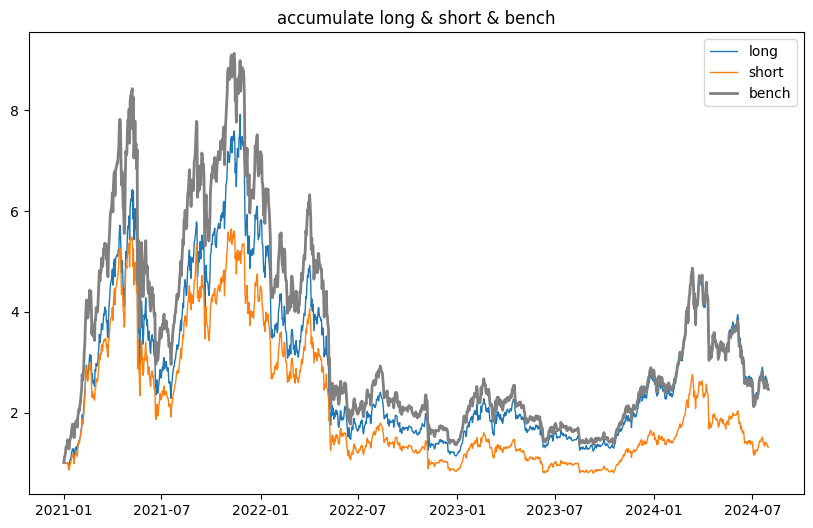

long: 
ann_return = 0.6914  sharpe = 0.7561  maxdd = 0.8557  calmar_ratio = 0.808  

short: 
ann_return = 0.5071  sharpe = 0.556  maxdd = 0.8585  calmar_ratio = 0.5907  

bench: 
ann_return = 0.6816  sharpe = 0.7464  maxdd = 0.8506  calmar_ratio = 0.8013  



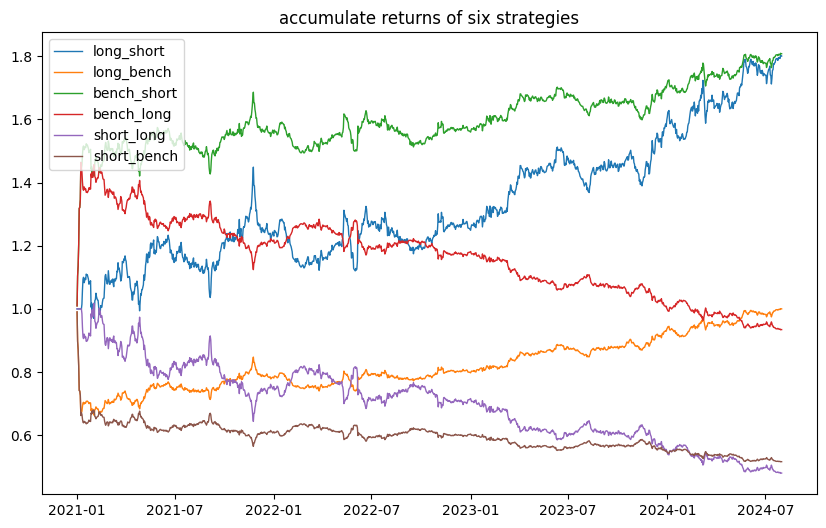

long_short: 
ann_return = 0.1843  sharpe = 0.9164  maxdd = 0.2266  calmar_ratio = 0.8129  

long_bench: 
ann_return = 0.0097  sharpe = 0.0708  maxdd = 0.331  calmar_ratio = 0.0294  

bench_short: 
ann_return = 0.1745  sharpe = 1.2644  maxdd = 0.1142  calmar_ratio = 1.5282  

bench_long: 
ann_return = -0.0097  sharpe = -0.0708  maxdd = 0.3619  calmar_ratio = -0.0268  

short_long: 
ann_return = -0.1843  sharpe = -0.9164  maxdd = 0.5287  calmar_ratio = -0.3485  

short_bench: 
ann_return = -0.1745  sharpe = -1.2644  maxdd = 0.479  calmar_ratio = -0.3644  



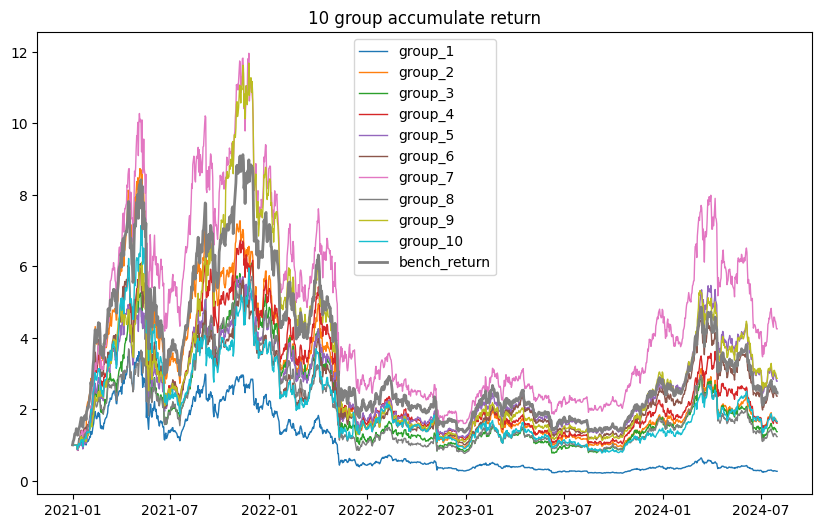

group_1: 
sharpe = 0.101  ann_return = 0.0951  maxdd = 0.9404  calmar_ratio = 0.1011  

group_2: 
sharpe = 0.6332  ann_return = 0.6128  maxdd = 0.8922  calmar_ratio = 0.6868  

group_3: 
sharpe = 0.5774  ann_return = 0.5359  maxdd = 0.8722  calmar_ratio = 0.6144  

group_4: 
sharpe = 0.6239  ann_return = 0.5802  maxdd = 0.849  calmar_ratio = 0.6834  

group_5: 
sharpe = 0.7854  ann_return = 0.7261  maxdd = 0.7924  calmar_ratio = 0.9162  

group_6: 
sharpe = 0.7364  ann_return = 0.6833  maxdd = 0.8341  calmar_ratio = 0.8191  

group_7: 
sharpe = 0.9126  ann_return = 0.8628  maxdd = 0.8657  calmar_ratio = 0.9967  

group_8: 
sharpe = 0.5413  ann_return = 0.5028  maxdd = 0.8653  calmar_ratio = 0.581  

group_9: 
sharpe = 0.7964  ann_return = 0.7564  maxdd = 0.9066  calmar_ratio = 0.8343  

group_10: 
sharpe = 0.6509  ann_return = 0.6544  maxdd = 0.8927  calmar_ratio = 0.733  



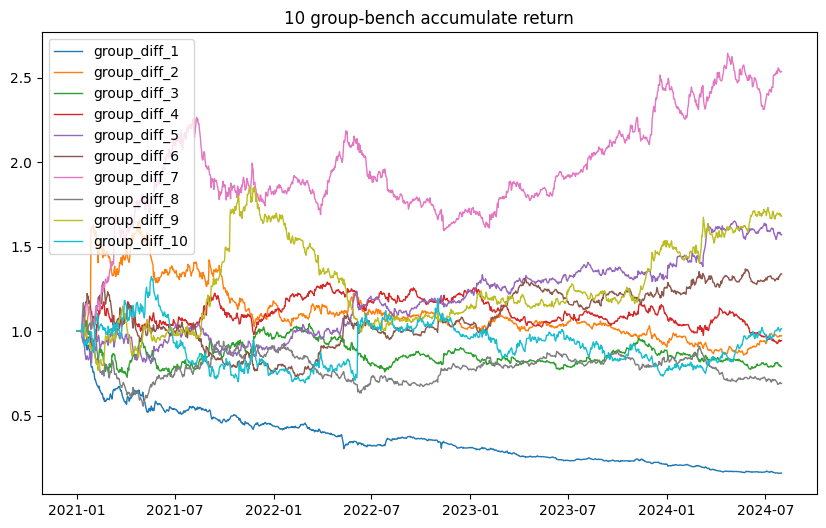

group_diff_1: 
sharpe = -2.0379  ann_return = -0.4799  maxdd = 0.8401  calmar_ratio = -0.5712  

group_diff_2: 
sharpe = 0.118  ann_return = 0.0378  maxdd = 0.4823  calmar_ratio = 0.0784  

group_diff_3: 
sharpe = -0.1702  ann_return = -0.0391  maxdd = 0.3151  calmar_ratio = -0.1241  

group_diff_4: 
sharpe = 0.0253  ann_return = 0.0052  maxdd = 0.2817  calmar_ratio = 0.0184  

group_diff_5: 
sharpe = 0.6707  ann_return = 0.1511  maxdd = 0.2106  calmar_ratio = 0.7172  

group_diff_6: 
sharpe = 0.4679  ann_return = 0.1083  maxdd = 0.4324  calmar_ratio = 0.2504  

group_diff_7: 
sharpe = 1.2025  ann_return = 0.2879  maxdd = 0.2957  calmar_ratio = 0.9735  

group_diff_8: 
sharpe = -0.2908  ann_return = -0.0722  maxdd = 0.5232  calmar_ratio = -0.138  

group_diff_9: 
sharpe = 0.6669  ann_return = 0.1814  maxdd = 0.4625  calmar_ratio = 0.3923  

group_diff_10: 
sharpe = 0.1986  ann_return = 0.0794  maxdd = 0.4748  calmar_ratio = 0.1672  



In [22]:
factors_np = factors[columns].to_numpy()
ret_np = ret[columns].to_numpy()

def factor_stats(n, pnl):
    net_value = (1 + pnl).cum_prod()
    sharpe = n ** 0.5 * pnl.mean() / pnl.std()
    ann_return = n * pnl.mean()
    maxdd = (-(net_value / net_value.cum_max() - 1)).max()
    calmar_ratio = ann_return / maxdd

    print("ann_return =", round(ann_return, 4), end='  ')
    print("sharpe =", round(sharpe, 4), end='  ')
    print("maxdd =", round(maxdd, 4), end='  ')
    print("calmar_ratio =", round(calmar_ratio, 4), end='  ')


percentage = 0.5
quantiles = np.nanquantile(factors_np, [1 - percentage, percentage], axis=1)

f = lambda x: quantiles[x][:, None].repeat(factors_np.shape[1], axis=-1)
long_quantile, short_quantile = f(0), f(1)

# return before fee
long = np.nan_to_num(np.nan_to_num(ret_np * (factors_np > long_quantile), 0.0).sum(axis=1) / (factors_np > long_quantile).sum(axis=1) , 0.0)
short = np.nan_to_num(np.nan_to_num(ret_np * (factors_np < long_quantile), 0.0).sum(axis=1) / (factors_np < long_quantile).sum(axis=1) , 0.0)
bench = np.nan_to_num(np.nanmean(ret_np, axis=1), 0.0)

# return after fee
long_fee = pl.Series(long - 2 * commission)
short_fee = pl.Series(short - 2 * commission)
bench_fee = pl.Series(bench - 2 * commission)

long_short = pl.Series(long - short - 2 * commission)
long_bench = pl.Series(long - bench - 2 * commission)
bench_short = pl.Series(bench - short - 2 * commission)
bench_long = pl.Series(bench - long - 2 * commission)
short_long = pl.Series(short - long - 2 * commission)
short_bench = pl.Series(short - bench - 2 * commission)


long_cum = (1 + long_fee).cum_prod()
short_cum = (1 + short_fee).cum_prod()
bench_cum = (1 + bench_fee).cum_prod()

long_short_cum = (1 + long_short).cum_prod()
long_bench_cum = (1 + long_bench).cum_prod()
bench_short_cum = (1 + bench_short).cum_prod()
bench_long_cum = (1 + bench_long).cum_prod()
short_long_cum = (1 + short_long).cum_prod()
short_bench_cum = (1 + short_bench).cum_prod()


plt.figure(figsize=(10, 6))
plt.plot(factors["open_time"].to_pandas(), long_cum.to_pandas(), label='long', linewidth=1)
plt.plot(factors["open_time"].to_pandas(), short_cum.to_pandas(), label='short', linewidth=1)
plt.plot(factors["open_time"].to_pandas(), bench_cum.to_pandas(), label='bench', linewidth=2, color="gray")
plt.title("accumulate long & short & bench")
plt.legend()
plt.show()

# 因子评价指标
# n = 365 * 24 #小时
n = 365 #天
# n = 52 #周
print("long: ")
factor_stats(n, long_fee)
print("\n")
print("short: ")
factor_stats(n, short_fee)
print("\n")
print("bench: ")
factor_stats(n, bench_fee)
print("\n")


plt.figure(figsize=(10, 6))
plt.plot(factors["open_time"].to_pandas(), long_short_cum.to_pandas(), label='long_short', linewidth=1)
plt.plot(factors["open_time"].to_pandas(), long_bench_cum.to_pandas(), label='long_bench', linewidth=1)
plt.plot(factors["open_time"].to_pandas(), bench_short_cum.to_pandas(), label='bench_short', linewidth=1)
plt.plot(factors["open_time"].to_pandas(), bench_long_cum.to_pandas(), label='bench_long', linewidth=1)
plt.plot(factors["open_time"].to_pandas(), short_long_cum.to_pandas(), label='short_long', linewidth=1)
plt.plot(factors["open_time"].to_pandas(),short_bench_cum.to_pandas(), label='short_bench', linewidth=1)
plt.title("accumulate returns of six strategies")
plt.legend()
plt.show()


# 因子评价指标
print("long_short: ")
factor_stats(n, long_short)
print("\n")

print("long_bench: ")
factor_stats(n, long_bench)
print("\n")

print("bench_short: ")
factor_stats(n, bench_short)
print("\n")

print("bench_long: ")
factor_stats(n, bench_long)
print("\n")

print("short_long: ")
factor_stats(n, short_long)
print("\n")

print("short_bench: ")
factor_stats(n, short_bench)
print("\n")

###################################################################################################################

quantiles = np.nanquantile(factors_np, np.linspace(0, 1, 11), axis=1)
total_count = np.count_nonzero(~np.isnan(factors_np), axis=1)
f = lambda x: quantiles[x][:, None].repeat(factors_np.shape[1], axis=-1)

#bench_return = np.nan_to_num(ret_np, 0.0).mean(axis=1)
bench_return = np.nan_to_num(np.nanmean(ret_np, axis=1), 0.0)
bench_return_fee = np.nan_to_num(np.nanmean(ret_np, axis=1), 0.0) - 2 * commission
group_return = np.zeros((factors_np.shape[0], 10))
group_diff_return = np.zeros((factors_np.shape[0], 10))

for i in range(1, 11):
    # 计算在当前分位数范围内的总收益。如果因子值位于该分位数的范围内，则相应的收益被计入总和。
    ret_sum = np.nan_to_num(ret_np * (f(i-1) <= factors_np) * (factors_np <= f(i)), 0.0).sum(axis=1)
    # 计算当前分位数范围内的有效数据点数
    ret_count = np.nan_to_num((f(i-1) <= factors_np) * (factors_np <= f(i)), 0.0).sum(axis=1)
    group_return[:, i-1] = ret_sum / ret_count - 2 * commission 
    group_diff_return[:, i-1] = ret_sum / ret_count - bench_return - 2 * commission


group_return = np.nan_to_num(group_return)
group_diff_return = np.nan_to_num(group_diff_return)


plt.figure(figsize=(10, 6))
plt.title("10 group accumulate return")
for i in range(10):
    plt.plot(factors["open_time"].to_pandas(), np.cumprod(1 + group_return[:, i]), label=f"group_{i+1}", linewidth=1)
plt.plot(factors["open_time"].to_pandas(), np.cumprod(1 + bench_return_fee), label=f"bench_return", linewidth=2, color="gray")
plt.legend()
plt.show()

for i in range(10):
    print(f"group_{i+1}: ")
    net_value = np.cumprod(1 + group_return[:, i])
    sharpe = n ** 0.5 * group_return[:, i].mean() / group_return[:, i].std()
    ann_return = n * group_return[:, i].mean()
    maxdd = (-(net_value / np.maximum.accumulate(net_value) - 1)).max()
    calmar_ratio = ann_return / maxdd
    print("sharpe =", round(sharpe, 4), end='  ')
    print("ann_return =", round(ann_return, 4), end='  ')
    print("maxdd =", round(maxdd, 4), end='  ')
    print("calmar_ratio =", round(calmar_ratio, 4), end='  ')
    print("\n")


plt.figure(figsize=(10, 6))
plt.title("10 group-bench accumulate return")
for i in range(10):
    plt.plot(factors["open_time"].to_pandas(), np.cumprod(1 + group_diff_return[:, i]), label=f"group_diff_{i+1}", linewidth=1)
plt.legend()
plt.show()

for i in range(10):
    print(f"group_diff_{i+1}: ")
    net_value = np.cumprod(1 + group_diff_return[:, i])
    sharpe = n ** 0.5 * group_diff_return[:, i].mean() / group_diff_return[:, i].std()
    ann_return = n * group_diff_return[:, i].mean()
    maxdd = (-(net_value / np.maximum.accumulate(net_value) - 1)).max()
    calmar_ratio = ann_return / maxdd
    print("sharpe =", round(sharpe, 4), end='  ')
    print("ann_return =", round(ann_return, 4), end='  ')
    print("maxdd =", round(maxdd, 4), end='  ')
    print("calmar_ratio =", round(calmar_ratio, 4), end='  ')
    print("\n")